In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import csv

In [5]:
TS_CSV = './649_fotonik3d_s_ts.csv'
CONFIG_CSV='./649_fotonik3d_s_regret_out.csv'

In [6]:
df = pd.read_csv(TS_CSV)
df.head()


,Timestamp,run_warm_up,run_1,run_2,run_3,run_4,run_5,run_6,run_7,run_8,...,run_43,run_44,run_45,run_46,run_47,run_48,run_49,run_50,run_default_jemalloc,run_default_tcmalloc
0,0,0.003095,0.003384,0.008108,0.005090,0.006563,0.006411,0.004623,0.006372,0.008062,...,0.006469,0.011174,0.006391,0.006404,0.007958,0.003154,0.003329,0.006570,0.001778,0.006275
1,1,0.277937,0.265310,0.287343,0.264853,0.280968,0.282402,0.194712,0.287213,0.290737,...,0.295882,0.313791,0.272669,0.000000,0.298744,0.268454,0.277963,0.273755,0.270245,0.284595
2,2,0.474574,0.214743,0.240088,0.214123,0.218847,0.218922,0.207245,0.228548,0.228593,...,0.222059,0.229830,0.212689,0.212423,0.224392,0.206775,0.206603,0.212232,0.223782,0.225184
3,3,0.423685,0.309204,0.355021,0.306757,0.323979,0.325156,0.298380,0.332255,0.337242,...,0.328855,0.351150,0.314119,0.313889,0.335337,0.297365,0.297212,0.314174,0.315822,0.329945
4,4,0.461249,0.216414,0.239949,0.215794,0.220508,0.220590,0.208907,0.226624,0.228600,...,0.223730,0.231491,0.214354,0.214085,0.226063,0.208439,0.208274,0.213900,0.221238,0.225969


In [7]:
configs = pd.read_csv(CONFIG_CSV)
configs.head()

,je_background_thread,je_cache_oblivious,je_dirty_decay_ms,je_dss,je_lg_extent_max_active_fit,je_lg_tcache_max,je_max_background_threads,je_metadata_thp,je_muzzy_decay_ms,je_narenas,je_oversize_threshold,je_percpu_arena,je_retain,je_tcache,je_thp,je_trust_madvise,rss
0,True,True,8864,secondary,23,16,47,auto,19649,559,19321336,phycpu,False,True,never,False,42.786068
1,False,False,47935,disabled,1,10,34,always,27197,141,11420046,disabled,True,False,always,True,-171.492697
2,False,True,21330,secondary,10,7,70,disabled,37928,309,5682178,disabled,False,True,default,False,-174.498644
3,True,False,35395,primary,15,29,12,auto,8902,392,31335540,percpu,True,False,always,True,-132.126956
4,True,True,37708,primary,18,22,74,disabled,44438,5,3094835,phycpu,False,False,always,True,-150.077596


In [8]:
configs.nsmallest(5, 'rss')

,je_background_thread,je_cache_oblivious,je_dirty_decay_ms,je_dss,je_lg_extent_max_active_fit,je_lg_tcache_max,je_max_background_threads,je_metadata_thp,je_muzzy_decay_ms,je_narenas,je_oversize_threshold,je_percpu_arena,je_retain,je_tcache,je_thp,je_trust_madvise,rss
45,True,False,43988,primary,24,5,7,always,45420,82,11863,disabled,False,False,default,True,-281.865255
48,True,False,40715,primary,24,3,6,auto,45420,166,6861,disabled,True,True,default,True,-281.393654
47,True,False,23020,primary,24,3,7,auto,45420,24,11863,disabled,False,False,never,True,-280.787032
37,True,False,45608,primary,24,5,10,always,45420,166,11863,disabled,True,False,default,True,-280.311903
44,True,False,45608,primary,23,1,7,always,45077,147,11863,phycpu,False,False,default,True,-277.515899


In [9]:
smallest_indices = configs.nsmallest(3, 'rss').index.tolist()

# Step 2: Map these indices to the corresponding column names in `df`
selected_columns = [f'run_{i+1}' for i in smallest_indices if f'run_{i}' in df.columns]
selected_columns

['run_46', 'run_49', 'run_48']

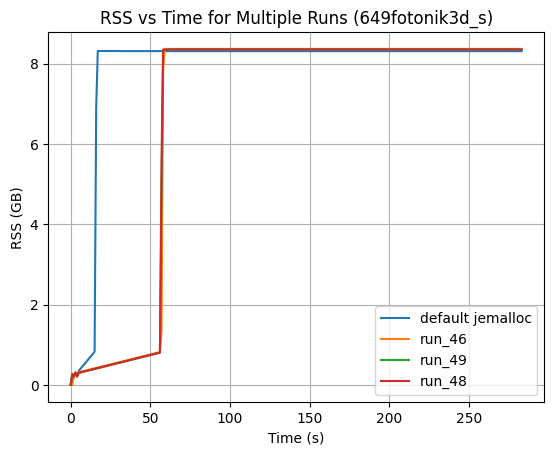

In [10]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(TS_CSV)
graph_name = TS_CSV.replace('_ts.csv', '').replace('_', '', 1)[2:]

# Extract timestamps and RSS values for each run
timestamps = df['Timestamp']
warmup = df['run_warm_up']
default = df['run_default_jemalloc']
tc_default = df['run_default_tcmalloc']

# plt.plot(timestamps, warmup / (1024*1024), label='warm_up')
plt.plot(timestamps, default, label='default jemalloc')
#plt.plot(timestamps, tc_default / (1024*1024), label='default tcmalloc')
for column in selected_columns:  # Skip 'Timestamp'
    plt.plot(timestamps, df[column], label=column)

# Customize plot
plt.xlabel('Time (s)')
plt.ylabel('RSS (GB)')
plt.title(f'RSS vs Time for Multiple Runs ({graph_name})')
plt.legend()
plt.grid(True)

# Display plot
plt.show()


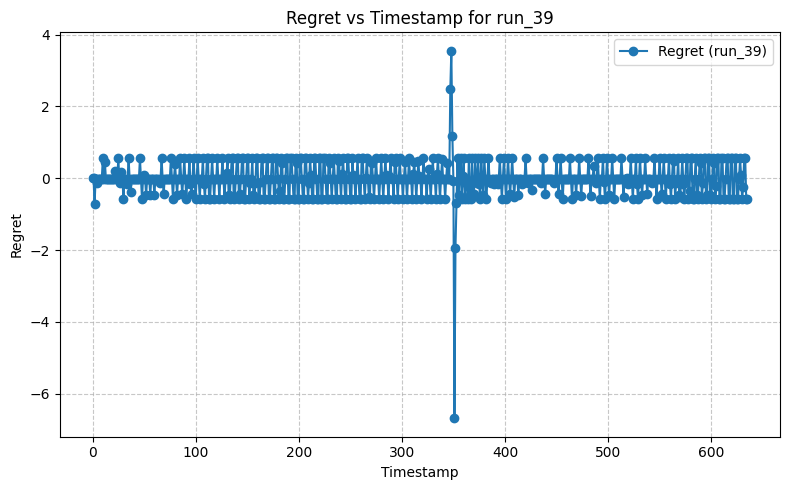

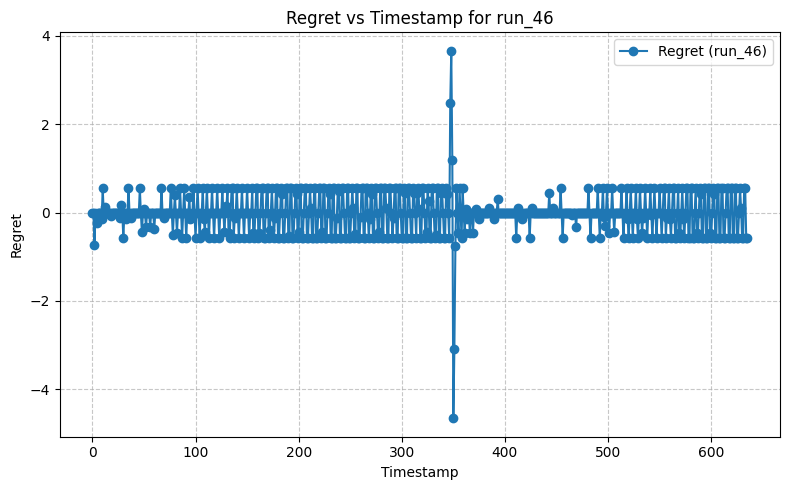

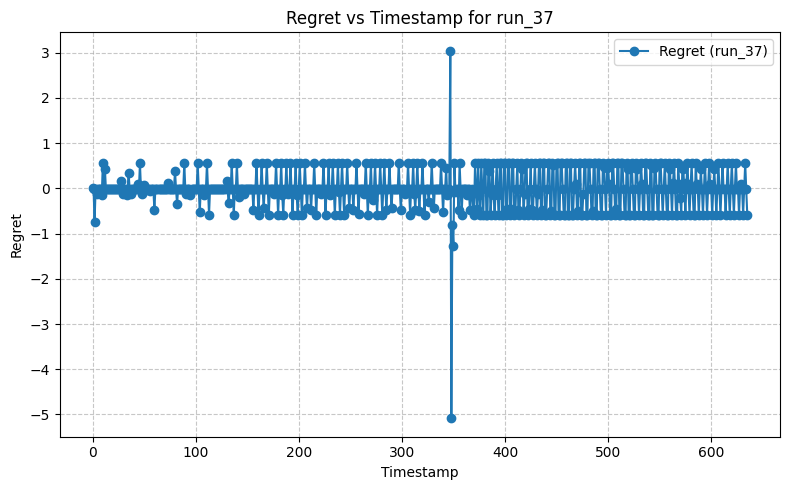

In [9]:
smallest_indices = configs.nsmallest(3, 'rss').index.tolist()

# Step 2: Map these indices to the corresponding column names in `df`
selected_columns = [f'run_{i+1}' for i in smallest_indices if f'run_{i+1}' in df.columns]

# Step 3: Generate separate plots for each selected column
for column in selected_columns:
    # Calculate regret for the current column
    regret =  (df[column] - df['run_default_jemalloc'])
    
    # Create a new plot for this column
    fig, ax = plt.subplots(figsize=(8, 5))
    
    # Plot the regret against the index
    ax.plot(regret.index, regret.values, marker='o', label=f'Regret ({column})')
    
    # Customize the plot
    ax.set_title(f'Regret vs Timestamp for {column}')
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Regret')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Display the plot
    plt.tight_layout()
    plt.show()

In [3]:
TIMESERIES_FILE = './538_imagick_r_timeseries.csv'
csvfile = pd.read_csv(TIMESERIES_FILE)
timestamps = csvfile['Timestamp']
rss_values = csvfile['RSS'] / (1024*1024)

# Plotting the RSS values over time
plt.plot(timestamps, rss_values, label='RSS over Time', marker='o')
plt.xlabel('Time (s)')  # X-axis label
plt.ylabel('RSS (MB)')  # Y-axis label
plt.title('RSS vs Time')  # Title of the plot
plt.legend()  # Display the legend
plt.grid(True)  # Add a grid for better readability

# Display the plot in the notebook
plt.show()


EmptyDataError: No columns to parse from file